In [12]:
from operator import index
import pandas as pd
import os
import math
import seaborn as sns
import matplotlib.pyplot as plt

In this project there are four main goals:
1. to count how many lines are in a drawing
2. to calculate the length of each line and the mean pressure when computing each line
3. to check how many hand lifts were in each drawing
4. to check if the shape is open or closed (bonus)

#### 1. counting how many lines are in a drawing

#### 2. calculating the length of each line and the mean pressure when computing each line:

In [13]:
def find_lines_length_by_index(df, indexes):
    #df is the dataframe, indexes is a list of the start/ end points of each line in the drawing (end of one is the start of another)
    if (len(indexes)==0):
        print("Total length: ", df['dist'].sum())
        
    for i in range(len(indexes)):
        if (i==0):
            print("Length of line 1: ", df[df.index < indexes[0]]['dist'].sum())
        elif (i==len(indexes)-1):
            print("Length of line ", len(indexes),": ", df[df.index > indexes[len(indexes)-1]]['dist'].sum())
        else:
            print("Length of line ", (i+1), ": ", df[(df.index > indexes[i-1]) and (df.index < indexes[i])]['dist'].sum())

In [ ]:
def find_lines_pressure_by_index(df, indexes):
    if (len(indexes)==0):
        print("Average pressure: ", df[' Pressure'].mean())
        
    for i in range(len(indexes)):
        if (i==0):
            print("Average pressure of line 1: ", df[df.index < indexes[0]][' Pressure'].mean())
        elif (i==len(indexes)-1):
            print("Average pressure of line ", len(indexes),": ", df[df.index > indexes[len(indexes)-1]][' Pressure'].mean())
        else:
            print("Average pressure of line ", (i+1), ": ", df[(df.index > indexes[i-1]) and (df.index < indexes[i])][' Pressure'].mean())

#### 3. checking how many hand lifts were in each drawing

In [20]:
def find_hand_off_by_pressure(df):
    ave_pressure = df[' Pressure'].mean()
    min_pressure = df[' Pressure'].min()
    max_pressure = df[' Pressure'].max()
    smallest_values = df[df[' Pressure'] < (min_pressure + max_pressure)/2].sort_index()
    smallest_values['idx'] = smallest_values.index
    smallest_values['idx_shift'] = smallest_values.shift()['idx']
    smallest_values.drop(smallest_values.head(1).index,inplace=True)
    num_of_hand_lifts = (smallest_values['idx']-smallest_values['idx_shift']).apply(lambda x: 0 if x==1.0 else 1).sum() + 1
    print("The number of hand lifts computed by pressure is: ", num_of_hand_lifts)

#### 4. checking if the shape is open or closed

In [26]:
def dist(x1, y1, x2, y2):
    return math.sqrt(pow(x1-x2,2) + pow(y1-y2,2))

In [29]:
def find_line(df, indexes, point):
    my_line = 0
    sta_idx = 0
    end_idx = 0
    if (point < indexes[0].index):
        my_line = 0
        sta_idx = 0
        end_idx = indexes[0].index
    elif (point > indexes[len(indexes)-1]):
        my_line = len(indexes) + 1
        sta_idx = indexes[len(indexes)-1].index
        end_idx = len(df)
    else:
        for line in range(1, len(indexes)):
            if (point > indexes[line-1].index and point < indexes[line].index):
                my_line = line + 1
                sta_idx = indexes[line-1].index
                end_idx = indexes[line].index
    return my_line, sta_idx, end_idx   

In [30]:
def which_lines_are_meetings(df, indexes):
    ave_radius = 0
    meet_list = ()
    my_line = 0
    if (len(indexes)==0):
        ave_radius = df['dist'].mean()
        for point in df.index:
            for point2 in df.index:
                if ((point==point2) or (point==point2+1) or (point==point2+2) or (point==point2+3) or 
                (point==point2+4) or (point==point2+5) or (point==point2-1) or (point==point2-2) or (point==point2-3)
                or (point==point2-4) or (point==point2-5)):
                    continue
                elif (dist(df[point]['X'], df[point][' Y'], df[point2]['X'], df[point2][' Y']) < ave_radius):
                    meet_list.append([0, 0])
                else:
                    continue
    else:
        for point in df.index:
            my_line, start_line, end_line = find_line(df, indexes, point)
            ave_radius = df[(df.index >= start_line) and (df.index < end_line)]['dist'].mean()
            for point2 in df.index:
                if ((point==point2) or (point==point2+1) or (point==point2+2) or (point==point2+3) or 
                (point==point2+4) or (point==point2+5) or (point==point2-1) or (point==point2-2) or (point==point2-3)
                or (point==point2-4) or (point==point2-5)):
                    continue
                elif (dist(df[point]['X'], df[point][' Y'], df[point2]['X'], df[point2][' Y']) < ave_radius):
                    point2_line, start2, end2 = find_line(df, indexes, point2)
                    meet_list.append([my_line, point2_line])
                else:
                    continue

In [21]:
def is_shape_open(df, indexes):
    #df is the dataframe, indexes is the list of start/end points of each line
    #does the average delta x needs to be to each line or to the whole shape?
    #averageradius = df['dist'].mean()
    #what if the shape is open and contains multiple lines that do not connect (such as picture number 9)
    boolian = False
    if (len(indexes)==0):
        
    for point in df.rows:
        for point2 in df.rows:
            if (point==point2):
                continue
            elif (dist(df[point]['X'], df[point][' Y'], df[point2]['X'], df[point2][' Y']) < averageradius):
                boolian = True
                break
    return boolian

testing functions:

In [25]:
for dir in os.listdir("C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data"):
    if os.path.isdir("C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/"+dir):
        full_dir = "C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/" + dir + "/SimpleTest/"
        for file in os.listdir(full_dir):
            if file.endswith('.csv'):
                if (file == "12.csv"):
                    print(full_dir+file)
                    df = pd.read_csv(full_dir+file)
                    df.drop(df.tail(2).index, inplace=True) #last two lines appers only on the 'X' column and contains summary of drawing time
                    if (df.shape[0] < 2): #less than 2 rows means that the file is empty
                        continue
                    df['X'] = df['X'].astype('float64')
                    df[' Time'] = pd.to_datetime(df[' Time'])
                    df[' Pressure'] = df[' Pressure'] * 100 #in order to see things more clearly in the graphs
                    df['dist'] = (df['X'].diff()**2 + df[' Y'].diff()**2).apply(lambda x: math.sqrt(x)) #the distance between point to the previous one
                    #df.drop(df.head(1).index, inplace=True) #the first measurment dosen't have distance because it dosen't have a previous point
                    print(df)

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7554/SimpleTest/12.csv
              X           Y   Pressure   TiltX   TiltY                Time  \
0    688.818570  526.514378   7.103074 -4515.0  2197.0 2022-06-14 00:18:11   
1    688.660584  525.724449   7.835507 -4515.0  2197.0 2022-06-14 00:18:12   
2    688.291951  523.670632   8.958571 -4515.0  2197.0 2022-06-14 00:18:13   
3    687.607345  520.405590  15.281910 -4515.0  2197.0 2022-06-14 00:18:14   
4    686.764753  517.719829  19.139391 -4515.0  2197.0 2022-06-14 00:18:15   
..          ...         ...        ...     ...     ...                 ...   
522  739.216076  253.567387  70.580608 -2757.0 -1514.0 2022-06-14 00:27:32   
523  741.164569  253.040767  69.774932 -2757.0 -1514.0 2022-06-14 00:27:33   
524  744.008315  252.882781  68.261236 -2757.0 -1514.0 2022-06-14 00:27:34   
525  745.324864  252.988105  67.284656 -2757.0 -1514.0 2022-06-14 00:27:35   
526  7

            X           Y   Pressure    TiltX    TiltY                Time  \
0    585.1050  385.573333  35.937500   9000.0   9000.0 2022-06-14 00:03:26   
1    581.4000  384.686667  38.183594  12044.0  13124.0 2022-06-14 00:03:27   
2    582.2550  387.473333  40.185547  11991.0  13064.0 2022-06-14 00:03:27   
3    582.9675  391.400000  43.969727  11991.0  13064.0 2022-06-14 00:03:28   
4    583.3950  393.806667  46.459961  11991.0  13064.0 2022-06-14 00:03:29   
..        ...         ...        ...      ...      ...                 ...   
211  889.3425  375.186667  67.211914  10422.0  13276.0 2022-06-14 00:08:03   
212  891.0525  374.173333  67.211914  10422.0  13276.0 2022-06-14 00:08:03   
213  895.3275  371.386667  67.211914  10422.0  13276.0 2022-06-14 00:08:06   
214  900.6000  368.473333  66.455078  10422.0  13276.0 2022-06-14 00:08:06   
215  901.7400  368.093333  65.283203  10370.0  13284.0 2022-06-14 00:08:07   

         dist  
0         NaN  
1    3.809620  
2    2.914882  

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7554/SimpleTest/12.csv
The number of hand lifts computed by pressure is:  4


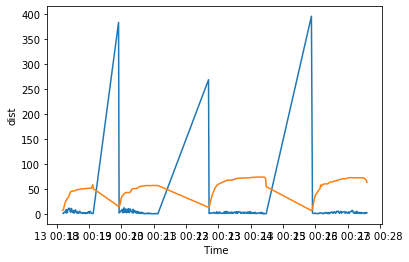

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7556/SimpleTest/12.csv
The number of hand lifts computed by pressure is:  3


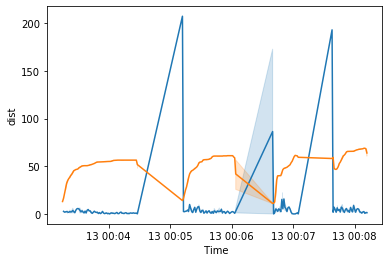

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7557/SimpleTest/12.csv
The number of hand lifts computed by pressure is:  5


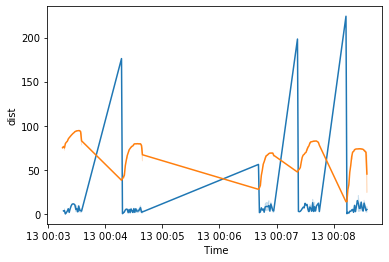

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7558/SimpleTest/12.csv
The number of hand lifts computed by pressure is:  3


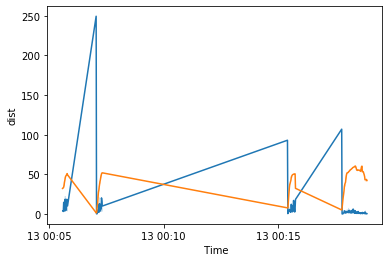

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7559/SimpleTest/12.csv
The number of hand lifts computed by pressure is:  4


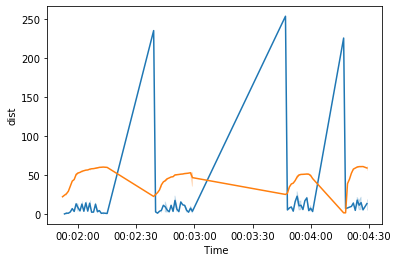

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7560/SimpleTest/12.csv
The number of hand lifts computed by pressure is:  4


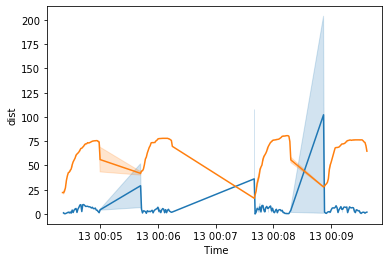

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7561/SimpleTest/12.csv
The number of hand lifts computed by pressure is:  7


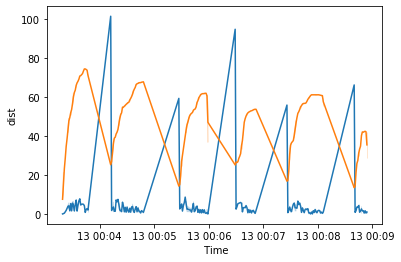

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7563/SimpleTest/12.csv
C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7569/SimpleTest/12.csv
The number of hand lifts computed by pressure is:  4


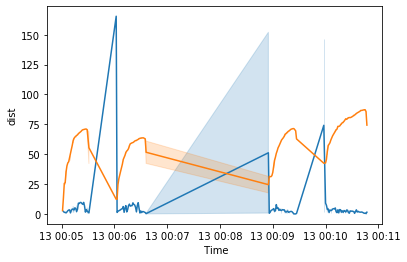

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7570/SimpleTest/12.csv
The number of hand lifts computed by pressure is:  4


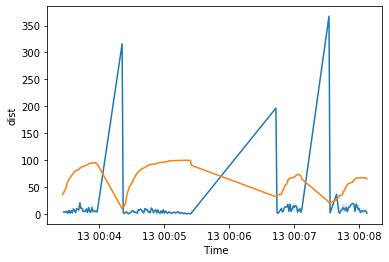

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7571/SimpleTest/12.csv
The number of hand lifts computed by pressure is:  4


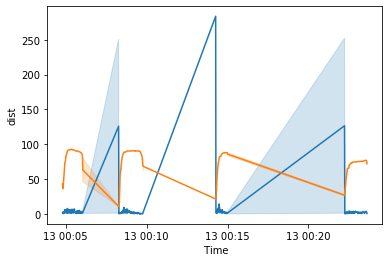

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7572/SimpleTest/12.csv
The number of hand lifts computed by pressure is:  3


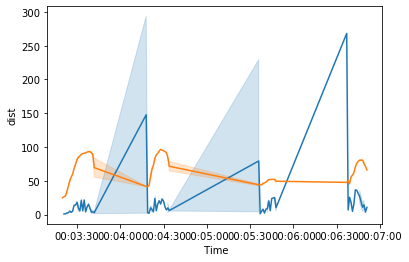

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7573/SimpleTest/12.csv
The number of hand lifts computed by pressure is:  3


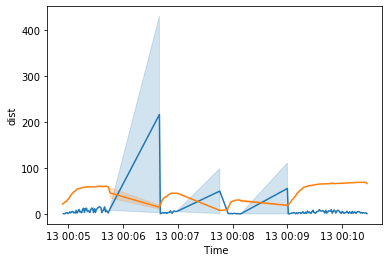

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7574/SimpleTest/12.csv
The number of hand lifts computed by pressure is:  4


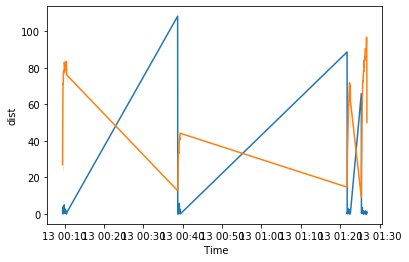

In [23]:
for dir in os.listdir("C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data"):
    if os.path.isdir("C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/"+dir):
        full_dir = "C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/" + dir + "/SimpleTest/"
        for file in os.listdir(full_dir):
            if file.endswith('.csv'):
                if (file == "12.csv"):
                    print(full_dir+file)
                    df = pd.read_csv(full_dir+file)
                    df.drop(df.tail(2).index, inplace=True) #last two lines appers only on the 'X' column and contains summary of drawing time
                    if (df.shape[0] < 2): #less than 2 rows means that the file is empty
                        continue
                    df['X'] = df['X'].astype('float64')
                    df[' Time'] = pd.to_datetime(df[' Time'])
                    df[' Pressure'] = df[' Pressure'] * 100 #in order to see things more clearly in the graphs
                    df['dist'] = (df['X'].diff()**2 + df[' Y'].diff()**2).apply(lambda x: math.sqrt(x)) #the distance between point to the previous one
                    #df.drop(df.head(1).index, inplace=True) #the first measurment dosen't have distance because it dosen't have a previous point
                    
                    find_hand_off_by_pressure(df)
                    
                    
                    sns.lineplot(data=df,y='dist', x=' Time')
                    sns.lineplot(data=df,y=' Pressure', x=' Time')
                    plt.show() #distance-Time graph with added line for pressure